https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneGroupOut.html

https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cluster.contingency_matrix.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html





https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [1]:
# Gradient Boost (learning rate = 0.4, maximum tree depth = 2, number of estimators = 100)
# Random Forest (number of estimators = 20, maximum tree depth = 10)
# KNN (k = 3)

In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import contingency_matrix

In [3]:
Neck = pd.read_pickle('Neck.pkl')
Neck.head()

,SubjectID,Fall,Acc_x_mean,Acc_y_mean,Acc_z_mean,Acc_x_sd,Acc_y_sd,Acc_z_sd,Acc_x_range,Acc_y_range,Acc_z_range,Gyr_x_mean,Gyr_y_mean,Gyr_z_mean,Gyr_x_sd,Gyr_y_sd,Gyr_z_sd,Gyr_x_range,Gyr_y_range,Gyr_z_range
0,1,0,3957.583403,190.906723,-365.076681,229.682115,248.881604,605.694447,1912,2515,3310,-92.959034,72.513655,15.962815,439.512094,155.406739,85.068883,2987,1778,1282
1,1,0,3960.485084,173.745798,-146.708824,134.063126,177.295636,583.398813,1314,1057,3140,-59.317017,75.186975,15.859874,54.685623,187.790185,29.422086,1454,2280,375
2,1,0,3985.363025,6.908824,-169.003571,254.015266,184.908416,497.555987,2499,1448,3311,17.923109,77.285924,10.892437,539.551233,180.658416,66.893825,3497,2634,881
3,1,0,3963.853992,212.468487,-124.448950,167.420631,102.895606,536.513281,1787,760,3238,-47.699580,78.401681,7.674160,78.917961,192.556151,33.213783,1022,2520,515
4,1,0,3931.365966,-418.005882,342.455882,237.777500,211.257231,520.121732,2236,1766,3856,-81.173950,67.378992,12.685294,523.609743,192.802506,113.943033,3254,1578,1075


In [24]:
Neck = pd.read_pickle('Neck.pkl')
X = Neck[['SubjectID', 'Acc_x_mean', 'Acc_y_mean', 'Acc_z_mean', 'Acc_x_sd', 'Acc_y_sd', 'Acc_z_sd', 'Acc_x_range', 'Acc_y_range', 
          'Acc_z_range', 'Gyr_x_mean', 'Gyr_y_mean', 'Gyr_z_mean', 'Gyr_x_sd', 'Gyr_y_sd', 'Gyr_z_sd', 'Gyr_x_range',
          'Gyr_y_range', 'Gyr_z_range']].values
y = Neck['Fall'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

smote = SMOTE(random_state=0)
knn = KNeighborsClassifier()
pipeline = Pipeline([('smote', smote), ('knn', knn)])

param_grid = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
              'knn__weights': ['uniform', 'distance'],
              'knn__p': [1, 2, 3],
              'smote__k_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# 'SubjectID' are the groups
groups = X_train[:, 0]
logo = LeaveOneGroupOut()

# remove 'SubjectID' from training and testing data
X_train = np.delete(X_train, 0, axis = 1)
X_test = np.delete(X_test, 0, axis = 1)

scorers = {'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')}

random_search_neck = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=logo, scoring=scorers, 
                                   refit='f1_score', random_state=0)
random_search_neck.fit(X_train, y_train, groups=groups)

print("Best parameters:", random_search_neck.best_params_)
print("Best accuracy:", random_search_neck.cv_results_['mean_test_accuracy'][random_search_neck.best_index_])
print("Best precision:", random_search_neck.cv_results_['mean_test_precision'][random_search_neck.best_index_])
print("Best recall:", random_search_neck.cv_results_['mean_test_recall'][random_search_neck.best_index_])
print("Best F1 score:", random_search_neck.cv_results_['mean_test_f1_score'][random_search_neck.best_index_])

Best parameters: {'smote__k_neighbors': 5, 'knn__weights': 'distance', 'knn__p': 1, 'knn__n_neighbors': 6}
Best accuracy: 0.8633031340935107
Best precision: 0.9011509307150741
Best recall: 0.8633031340935107
Best F1 score: 0.869747716676957


Accuracy: 0.9256594724220624
Precision: 0.9349730193169727
Recall: 0.9256594724220624
F1-score: 0.9272956432491859


<AxesSubplot:>

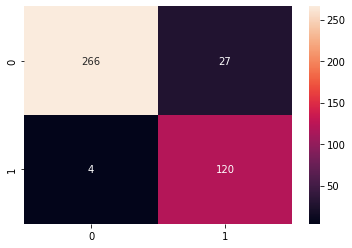

In [36]:
y_pred = random_search_neck.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:", recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:", f1_score(y_test, y_pred, average = 'weighted'))
matrix = contingency_matrix(y_test, y_pred)
# sns.heatmap(matrix, annot=True, fmt=".0f")

In [44]:
Waist = pd.read_pickle('Waist.pkl')
X = Waist[['Acc_x_mean', 'Acc_y_mean', 'Acc_z_mean', 'Acc_x_sd', 'Acc_y_sd', 'Acc_z_sd', 'Acc_x_range', 'Acc_y_range', 
          'Acc_z_range', 'Gyr_x_mean', 'Gyr_y_mean', 'Gyr_z_mean', 'Gyr_x_sd', 'Gyr_y_sd', 'Gyr_z_sd', 'Gyr_x_range',
          'Gyr_y_range', 'Gyr_z_range']].values
y = Waist['Fall'].values

smote = SMOTE(random_state=0)
knn = KNeighborsClassifier()
pipeline = Pipeline([('smote', smote), ('knn', knn)])

param_grid = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
              'knn__weights': ['uniform', 'distance'],
              'smote__k_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

groups = Waist['SubjectID']
logo = LeaveOneGroupOut()

scorers = {'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')}

random_search_waist = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=logo, scoring=scorers, 
                                   refit='f1_score', random_state=0)
random_search_waist.fit(X, y, groups=groups)

print("Best parameters:", random_search_waist.best_params_)
print("Best accuracy:", random_search_waist.cv_results_['mean_test_accuracy'][random_search.best_index_])
print("Best precision:", random_search_waist.cv_results_['mean_test_precision'][random_search.best_index_])
print("Best recall:", random_search_waist.cv_results_['mean_test_recall'][random_search.best_index_])
print("Best F1 score:", random_search_waist.cv_results_['mean_test_f1_score'][random_search.best_index_])

Best parameters: {'smote__k_neighbors': 6, 'knn__weights': 'distance', 'knn__n_neighbors': 8}
Best accuracy: 0.8625635236586515
Best precision: 0.894786178955767
Best recall: 0.8625635236586515
Best F1 score: 0.8665920046900026


In [45]:
Wrist = pd.read_pickle('Wrist.pkl')
X = Wrist[['Acc_x_mean', 'Acc_y_mean', 'Acc_z_mean', 'Acc_x_sd', 'Acc_y_sd', 'Acc_z_sd', 'Acc_x_range', 'Acc_y_range', 
          'Acc_z_range', 'Gyr_x_mean', 'Gyr_y_mean', 'Gyr_z_mean', 'Gyr_x_sd', 'Gyr_y_sd', 'Gyr_z_sd', 'Gyr_x_range',
          'Gyr_y_range', 'Gyr_z_range']].values
y = Wrist['Fall'].values

smote = SMOTE(random_state=0)
knn = KNeighborsClassifier()
pipeline = Pipeline([('smote', smote), ('knn', knn)])

param_grid = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
              'knn__weights': ['uniform', 'distance'], 
              'smote__k_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

groups = Wrist['SubjectID']
logo = LeaveOneGroupOut()

scorers = {'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')}

random_search_wrist = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=logo, scoring=scorers, 
                                   refit='f1_score', random_state=0)
random_search_wrist.fit(X, y, groups=groups)

print("Best parameters:", random_search_wrist.best_params_)
print("Best accuracy:", random_search_wrist.cv_results_['mean_test_accuracy'][random_search.best_index_])
print("Best precision:", random_search_wrist.cv_results_['mean_test_precision'][random_search.best_index_])
print("Best recall:", random_search_wrist.cv_results_['mean_test_recall'][random_search.best_index_])
print("Best F1 score:", random_search_wrist.cv_results_['mean_test_f1_score'][random_search.best_index_])

Best parameters: {'smote__k_neighbors': 1, 'knn__weights': 'uniform', 'knn__n_neighbors': 4}
Best accuracy: 0.8270829723070234
Best precision: 0.889716698713809
Best recall: 0.8270829723070234
Best F1 score: 0.8390477747206355


[Text(0.5, 1.0, 'F1-score')]

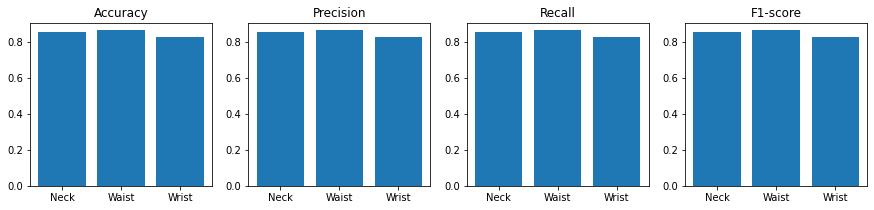

In [46]:
# import matplotlib.pyplot as plt

# x_plot = ['Neck', 'Waist', 'Wrist']
# accuracy = [random_search_neck.cv_results_['mean_test_accuracy'][random_search.best_index_],
#             random_search_waist.cv_results_['mean_test_accuracy'][random_search.best_index_],
#             random_search_wrist.cv_results_['mean_test_accuracy'][random_search.best_index_]]
# precision = [random_search_neck.cv_results_['mean_test_accuracy'][random_search.best_index_],
#              random_search_waist.cv_results_['mean_test_accuracy'][random_search.best_index_],
#              random_search_wrist.cv_results_['mean_test_accuracy'][random_search.best_index_]]
# recall = [random_search_neck.cv_results_['mean_test_accuracy'][random_search.best_index_],
#           random_search_waist.cv_results_['mean_test_accuracy'][random_search.best_index_],
#           random_search_wrist.cv_results_['mean_test_accuracy'][random_search.best_index_]]
# f1 = [random_search_neck.cv_results_['mean_test_accuracy'][random_search.best_index_],
#       random_search_waist.cv_results_['mean_test_accuracy'][random_search.best_index_],
#       random_search_wrist.cv_results_['mean_test_accuracy'][random_search.best_index_]]

# fig, axs = plt.subplots(1, 4, figsize=(15, 3))
# axs[0].bar(x_plot, accuracy)
# axs[0].set(title='Accuracy')
# axs[1].bar(x_plot, precision)
# axs[1].set(title='Precision')
# axs[2].bar(x_plot, recall)
# axs[2].set(title='Recall')
# axs[3].bar(x_plot, f1)
# axs[3].set(title='F1-score')

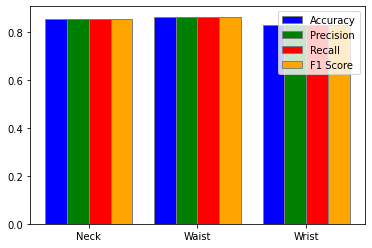

In [47]:
# import matplotlib.pyplot as plt

# x_plot = ['Neck', 'Waist', 'Wrist']
# accuracy = [random_search_neck.cv_results_['mean_test_accuracy'][random_search.best_index_],
#             random_search_waist.cv_results_['mean_test_accuracy'][random_search.best_index_],
#             random_search_wrist.cv_results_['mean_test_accuracy'][random_search.best_index_]]
# precision = [random_search_neck.cv_results_['mean_test_accuracy'][random_search.best_index_],
#              random_search_waist.cv_results_['mean_test_accuracy'][random_search.best_index_],
#              random_search_wrist.cv_results_['mean_test_accuracy'][random_search.best_index_]]
# recall = [random_search_neck.cv_results_['mean_test_accuracy'][random_search.best_index_],
#           random_search_waist.cv_results_['mean_test_accuracy'][random_search.best_index_],
#           random_search_wrist.cv_results_['mean_test_accuracy'][random_search.best_index_]]
# f1 = [random_search_neck.cv_results_['mean_test_accuracy'][random_search.best_index_],
#       random_search_waist.cv_results_['mean_test_accuracy'][random_search.best_index_],
#       random_search_wrist.cv_results_['mean_test_accuracy'][random_search.best_index_]]

# bar_width = 0.2
# r1 = range(len(x_plot))
# r2 = [x + bar_width for x in r1]
# r3 = [x + bar_width for x in r2]
# r4 = [x + bar_width for x in r3]

# plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
# plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
# plt.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
# plt.bar(r4, f1, color='orange', width=bar_width, edgecolor='grey', label='F1 Score')

# plt.xticks([r + bar_width + 0.1 for r in range(len(x_plot))], x_plot)
# plt.legend()